# Analysis of Hallprobe data for Booster Dipole Magnets

## Nominal Energy: 3 GeV (Current: 991.63 A)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import siriuspy.util as util
%matplotlib notebook

def get_data_from_file(fname):
    with open(fname, 'r') as f:
        text = f.readlines()
    data = dict()
    for line in text:
        if 'bd-' in line:
            l = line.replace('|','').replace('*','').split()
            serial, *datum = l
            data[serial] = np.array([float(d) for d in datum])
    return data

brho, *_ = util.beam_rigidity(3.0)

spec_dip = 7.2    # [Deg]
spec_dip_error = 0.15  # [%]
spec_quad = 2.4788148246867  # [T]
spec_quad_error = 2.4  # [%]
spec_sext = 25.627729062301  # [T/m]
spec_sext_error = 9.0  # [%]

serials = (
    'bd-004', 'bd-005', 'bd-006', 'bd-007', 'bd-008', 'bd-009', 'bd-010', 
    'bd-011', 'bd-012', 'bd-013', 'bd-014', 'bd-015', 'bd-016', 'bd-017', 'bd-018', 'bd-019', 'bd-020',
    'bd-021', 'bd-022', 'bd-023', 'bd-024', 'bd-025', 'bd-026', 'bd-027', 'bd-028', 'bd-029', 'bd-030',
    'bd-031', 'bd-032', 'bd-033', 'bd-034', 'bd-035', 'bd-036', 'bd-037', 'bd-038', 'bd-039', 'bd-040',
    'bd-041', 'bd-042', 'bd-043', 'bd-044', 'bd-045', 'bd-046', 'bd-047', 'bd-048', 'bd-049', 'bd-050',
    'bd-051', 'bd-052', 'bd-053', 'bd-054', 'bd-055', 'bd-056', 'bd-057',
)


# analysis from FAC (x0-variable-old)
dataP = get_data_from_file('x0-variable-old/README-0991p63A-Zpositive.md')
dataN = get_data_from_file('x0-variable-old/README-0991p63A-Znegative.md')
data = dict()
for s in serials:
    data[s] = np.array(dataP[s]) + np.array(dataN[s])

# analysis from FAC (x0-9p1013mm)
dataP = get_data_from_file('x0-9p1013mm/README-0991p63A-Zpositive.md')
dataN = get_data_from_file('x0-9p1013mm/README-0991p63A-Znegative.md')
data3 = dict()
for s in serials:
    data3[s] = np.array(dataP[s]) + np.array(dataN[s])

# analysis from IMA (taken from excel spreadsheet)
data2 = {
    'bd-004': [-1.2570, 2.4262, 26.6981],
    'bd-005': [-1.2575, 2.4185, 25.7416],
    'bd-006': [-1.2580, 2.4281, 26.6484],
    'bd-007': [-1.2551, 2.4309, 26.9358],
    'bd-008': [-1.2588, 2.4311, 26.7229],
    'bd-009': [-1.2566, 2.4166, 26.9109],
    'bd-010': [-1.2585, 2.4213, 26.6716],
    'bd-011': [-1.2590, 2.4381, 26.5355],
    'bd-012': [-1.2566, 2.4220, 26.0002],
    'bd-013': [-1.2566, 2.4269, 27.2825],
    'bd-014': [-1.2546, 2.4260, 26.4683],
    'bd-015': [-1.2535, 2.4289, 27.0879],
    'bd-016': [-1.2577, 2.4360, 26.5575],
    'bd-017': [-1.2571, 2.4270, 26.6441],
    'bd-018': [-1.2557, 2.4302, 26.8313],
    'bd-019': [-1.2591, 2.4430, 26.4712],
    'bd-020': [-1.2590, 2.4428, 26.0943],
    'bd-021': [-1.2559, 2.4322, 26.8156],
    'bd-022': [-1.2563, 2.4178, 26.5363],
    'bd-023': [-1.2578, 2.4223, 27.4141],
    'bd-024': [-1.2586, 2.4277, 26.9775],
    'bd-025': [-1.2567, 2.4359, 26.6173],
    'bd-026': [-1.2575, 2.4334, 26.5618],
    'bd-027': [-1.2568, 2.4315, 27.1432],
    'bd-028': [-1.2566, 2.4355, 25.8140],
    'bd-029': [-1.2551, 2.4245, 26.3486],
    'bd-030': [-1.2558, 2.4312, 26.6464],
    'bd-031': [-1.2567, 2.4261, 26.6649],
    'bd-032': [-1.2557, 2.4285, 25.9091],
    'bd-033': [-1.2585, 2.4424, 26.2608],
    'bd-034': [-1.2551, 2.4325, 27.0728],
    'bd-035': [-1.2546, 2.4341, 26.1521],
    'bd-036': [-1.2557, 2.4231, 26.8006],
    'bd-037': [-1.2590, 2.4290, 27.1213],
    'bd-038': [-1.2565, 2.4291, 25.5840],
    'bd-039': [-1.2569, 2.4287, 28.2460],
    'bd-040': [-1.2582, 2.4307, 26.8068],
    'bd-041': [-1.2571, 2.4270, 27.0068],
    'bd-042': [-1.2574, 2.4241, 26.9293],
    'bd-043': [-1.2576, 2.4223, 26.7094],
    'bd-044': [-1.2580, 2.4186, 26.6965],
    'bd-045': [-1.2569, 2.4266, 25.8210],
    'bd-046': [-1.2560, 2.4222, 25.8879],
    'bd-047': [-1.2586, 2.4236, 26.3488],
    'bd-048': [-1.2574, 2.4206, 26.2407],
    'bd-049': [-1.2571, 2.4253, 26.8793],
    'bd-050': [-1.2583, 2.4178, 26.6271],
    'bd-051': [-1.2586, 2.4327, 27.0037],
    'bd-052': [-1.2561, 2.4293, 26.2240],
    'bd-053': [-1.2561, 2.4242, 26.1730],
    'bd-054': [-1.2561, 2.4254, 26.4562],
    'bd-055': [-1.2573, 2.4210, 27.1562],
    'bd-056': [-1.2596, 2.4202, 27.0648],
    'bd-057': [-1.2575, 2.4319, 26.0836],
}

for i in range(len(serials)):
    print('{:02d}:{:6s}  '.format(i+1, serials[i]), end='')
    if not (i+1) % 10:
        print('')

01:bd-004  02:bd-005  03:bd-006  04:bd-007  05:bd-008  06:bd-009  07:bd-010  08:bd-011  09:bd-012  10:bd-013  
11:bd-014  12:bd-015  13:bd-016  14:bd-017  15:bd-018  16:bd-019  17:bd-020  18:bd-021  19:bd-022  20:bd-023  
21:bd-024  22:bd-025  23:bd-026  24:bd-027  25:bd-028  26:bd-029  27:bd-030  28:bd-031  29:bd-032  30:bd-033  
31:bd-034  32:bd-035  33:bd-036  34:bd-037  35:bd-038  36:bd-039  37:bd-040  38:bd-041  39:bd-042  40:bd-043  
41:bd-044  42:bd-045  43:bd-046  44:bd-047  45:bd-048  46:bd-049  47:bd-050  48:bd-051  49:bd-052  50:bd-053  
51:bd-054  52:bd-055  53:bd-056  54:bd-057  

# Deflection Angle

Specification deflection angle                    : +7.20000 T
Magnets deflection angle average (IMA)            : +7.19732 T. (-0.04 %)
Magnets deflection angle average (FAC)            : +7.19713 T. (-0.04 %)
Magnets deflection angle average (FAC x0=9.1013mm): +7.19800 T. (-0.03 %)

Specification deflection angle stddev            : 0.15 %
Magnets deflection angle stddev (IMA)            : 0.10 %
Magnets deflection angle stddev (FAC)            : 0.11 %
Magnets deflection angle stddev (FAC x0=9.1013mm): 0.10 %


<IPython.core.display.Javascript object>


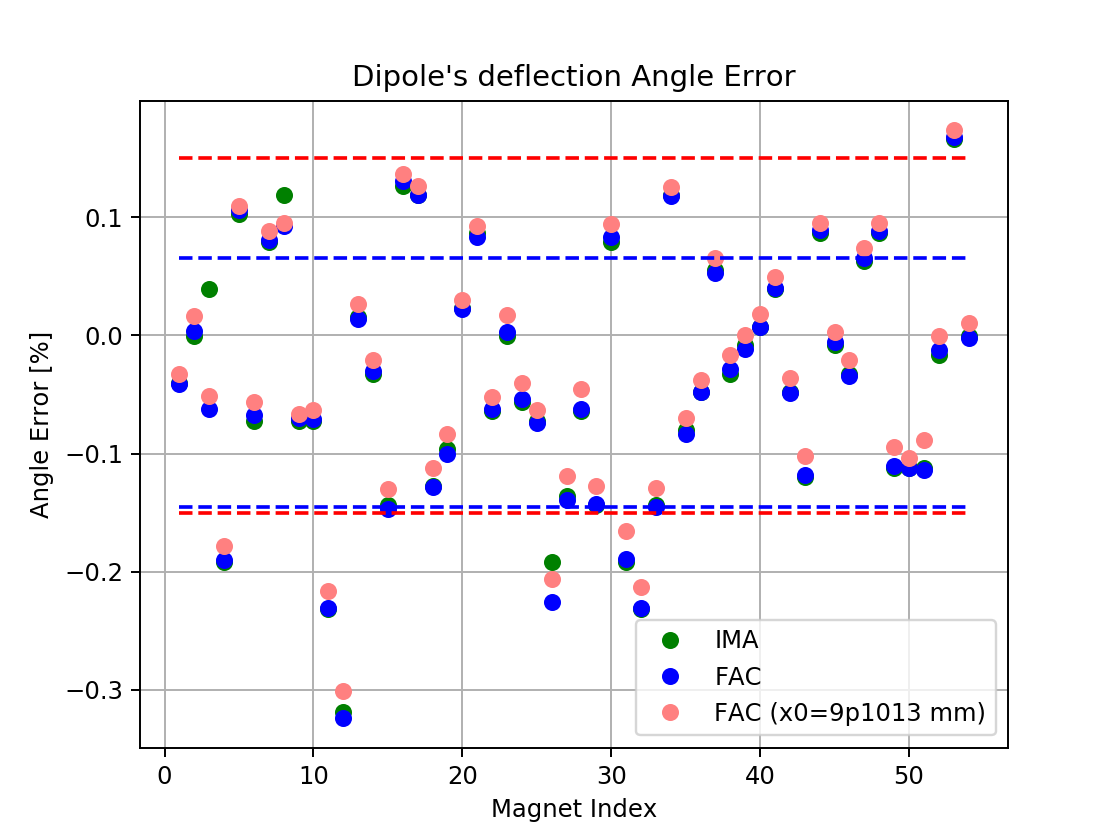

In [30]:
spec_d, spec_d_error = spec_dip, spec_dip_error

d2 = -(180/np.pi)*np.array([data2[mag][0] for mag in serials])/brho
d2_avg = np.mean(d2)
d2_avg_error = 100*(d2_avg - spec_d)/spec_d
d2_error = 100*(d2 - spec_d)/spec_d
d2_error_std = np.std(d2_error)

d = -np.array([data[mag][0] for mag in serials])
d_avg = np.mean(d)
d_avg_error = 100*(d_avg - spec_d)/spec_d
d_error = 100*(d - spec_d)/spec_d
d_error_avg = np.mean(d_error)
d_error_std = np.std(d_error)
n = len(d_error)

d3 = -np.array([data3[mag][0] for mag in serials])
d3_avg = np.mean(d3)
d3_avg_error = 100*(d3_avg - spec_d)/spec_d
d3_error = 100*(d3 - spec_d)/spec_d
d3_error_avg = np.mean(d3_error)
d3_error_std = np.std(d3_error)

print('Specification deflection angle                    : {:+.5f} T'.format(spec_d))
print('Magnets deflection angle average (IMA)            : {:+.5f} T. ({:+.2f} %)'.format(d2_avg, d2_avg_error))
print('Magnets deflection angle average (FAC)            : {:+.5f} T. ({:+.2f} %)'.format(d_avg, d_avg_error))
print('Magnets deflection angle average (FAC x0=9.1013mm): {:+.5f} T. ({:+.2f} %)'.format(d3_avg, d3_avg_error))

print()
print('Specification deflection angle stddev            : {:.2f} %'.format(spec_d_error))
print('Magnets deflection angle stddev (IMA)            : {:.2f} %'.format(d2_error_std))
print('Magnets deflection angle stddev (FAC)            : {:.2f} %'.format(d_error_std))
print('Magnets deflection angle stddev (FAC x0=9.1013mm): {:.2f} %'.format(d3_error_std))


plt.figure()
# Data
plt.plot(range(1,n+1), d2_error, 'og', label='IMA')
plt.plot(range(1,n+1), d_error, 'ob', label='FAC')
plt.plot(range(1,n+1), d3_error, 'o', color=(1,0.5,0.5), label='FAC (x0=9p1013 mm)')

# Data RMS
plt.plot([1, n], [d_error_avg + d_error_std, ]*2, '--b')
plt.plot([1, n], [d_error_avg - d_error_std, ]*2, '--b')
# Spec RMS
plt.plot([1, n], [-spec_d_error, ]*2, '--r')
plt.plot([1, n], [+spec_d_error, ]*2, '--r')

plt.grid()
plt.xlabel('Magnet Index')
plt.ylabel('Angle Error [%]')
plt.title("Dipole's deflection Angle Error")
plt.legend()
plt.show()

# Integrated Quadrupole

Specification quadrupole                    : +2.47881 T
Magnets quadrupole average (IMA)            : +7.19732 T. (-0.04 %)
Magnets quadrupole average (FAC)            : +2.42761 T. (-2.07 %)
Magnets quadrupole average (FAC x0=9.1013mm): +2.42668 T. (-2.10 %)

Specification quadrupole stddev            : 2.40 %
Magnets quadrupole stddev (IMA)            : 0.25 %
Magnets quadrupole stddev (FAC)            : 0.26 %
Magnets quadrupole stddev (FAC x0=9.1013mm): 0.26 %


<IPython.core.display.Javascript object>


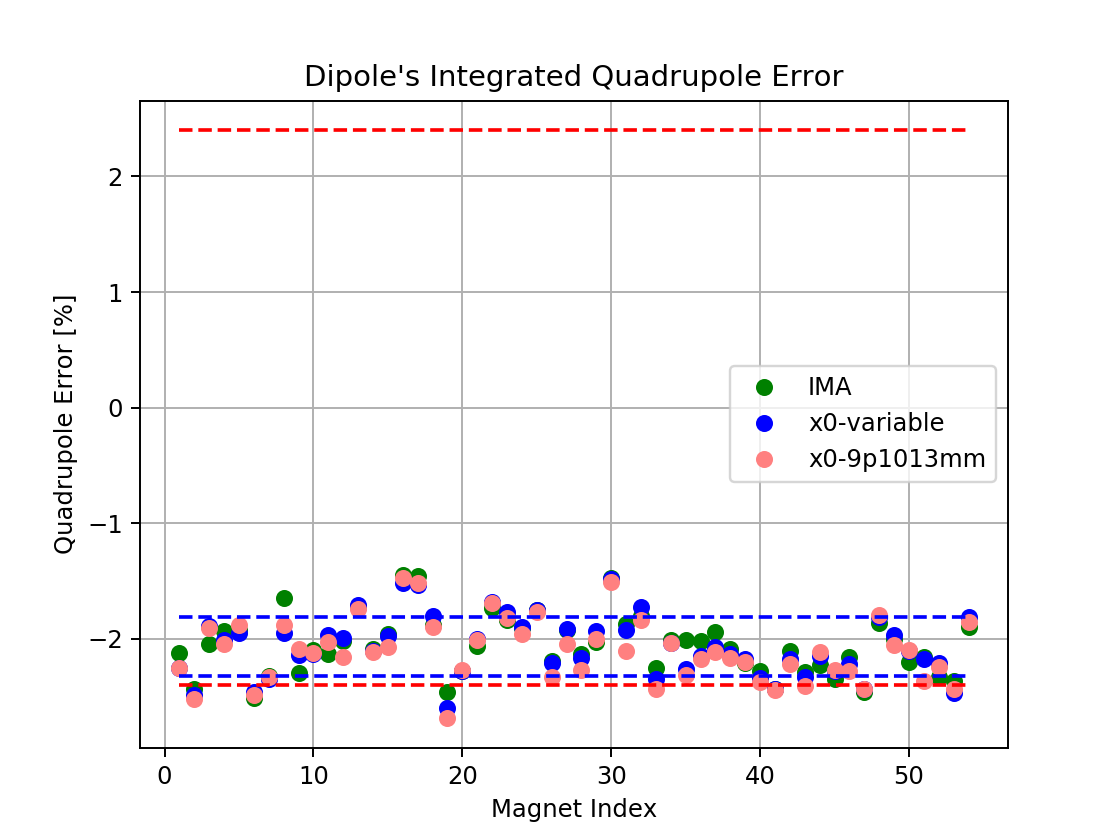

In [31]:
spec_d, spec_d_error = spec_quad, spec_quad_error

d2 = np.array([data2[mag][1] for mag in serials])
d2_error = 100*(d2 - spec_d)/spec_d
d2_error = 100*(d2 - spec_d)/spec_d
d2_error_std = np.std(d2_error)

d = np.array([data[mag][2] for mag in serials])
d_avg = np.mean(d)
d_avg_error = 100*(d_avg - spec_d)/spec_d
d_error = 100*(d - spec_d)/spec_d
d_error_avg = np.mean(d_error)
d_error_std = np.std(d_error)
n = len(d_error)

d3 = np.array([data3[mag][2] for mag in serials])
d3_avg = np.mean(d3)
d3_avg_error = 100*(d3_avg - spec_d)/spec_d
d3_error = 100*(d3 - spec_d)/spec_d
d3_error_avg = np.mean(d3_error)
d3_error_std = np.std(d3_error)

print('Specification quadrupole                    : {:+.5f} T'.format(spec_d))
print('Magnets quadrupole average (IMA)            : {:+.5f} T. ({:+.2f} %)'.format(d2_avg, d2_avg_error))
print('Magnets quadrupole average (FAC)            : {:+.5f} T. ({:+.2f} %)'.format(d_avg, d_avg_error))
print('Magnets quadrupole average (FAC x0=9.1013mm): {:+.5f} T. ({:+.2f} %)'.format(d3_avg, d3_avg_error))

print()
print('Specification quadrupole stddev            : {:.2f} %'.format(spec_d_error))
print('Magnets quadrupole stddev (IMA)            : {:.2f} %'.format(d2_error_std))
print('Magnets quadrupole stddev (FAC)            : {:.2f} %'.format(d_error_std))
print('Magnets quadrupole stddev (FAC x0=9.1013mm): {:.2f} %'.format(d3_error_std))

plt.figure()
# Data
plt.plot(range(1,n+1), d2_error, 'og', label='IMA')
plt.plot(range(1,n+1), d_error, 'ob', label='x0-variable')
plt.plot(range(1,n+1), d3_error, 'o', color=(1,0.5,0.5), label='x0-9p1013mm')
# Data RMS
plt.plot([1, n], [d_error_avg + d_error_std, ]*2, '--b')
plt.plot([1, n], [d_error_avg - d_error_std, ]*2, '--b')
# Spec RMS
plt.plot([1, n], [-spec_d_error, ]*2, '--r')
plt.plot([1, n], [+spec_d_error, ]*2, '--r')

plt.grid()
plt.xlabel('Magnet Index')
plt.ylabel('Quadrupole Error [%]')
plt.title("Dipole's Integrated Quadrupole Error")
plt.legend()
plt.show()

# Integrated Sextupole

Specification sextupole                    : +25.62773 T
Magnets sextupole average (IMA)            : +7.19732 T. (-0.04 %)
Magnets sextupole average (FAC)            : +26.57988 T. (+3.72 %)
Magnets sextupole average (FAC x0=9.1013mm): +26.57827 T. (+3.71 %)

Specification sextupole stddev            : 9.00 %
Magnets sextupole stddev (IMA)            : 1.86 %
Magnets sextupole stddev (FAC)            : 3.50 %
Magnets sextupole stddev (FAC x0=9.1013mm): 3.51 %


<IPython.core.display.Javascript object>


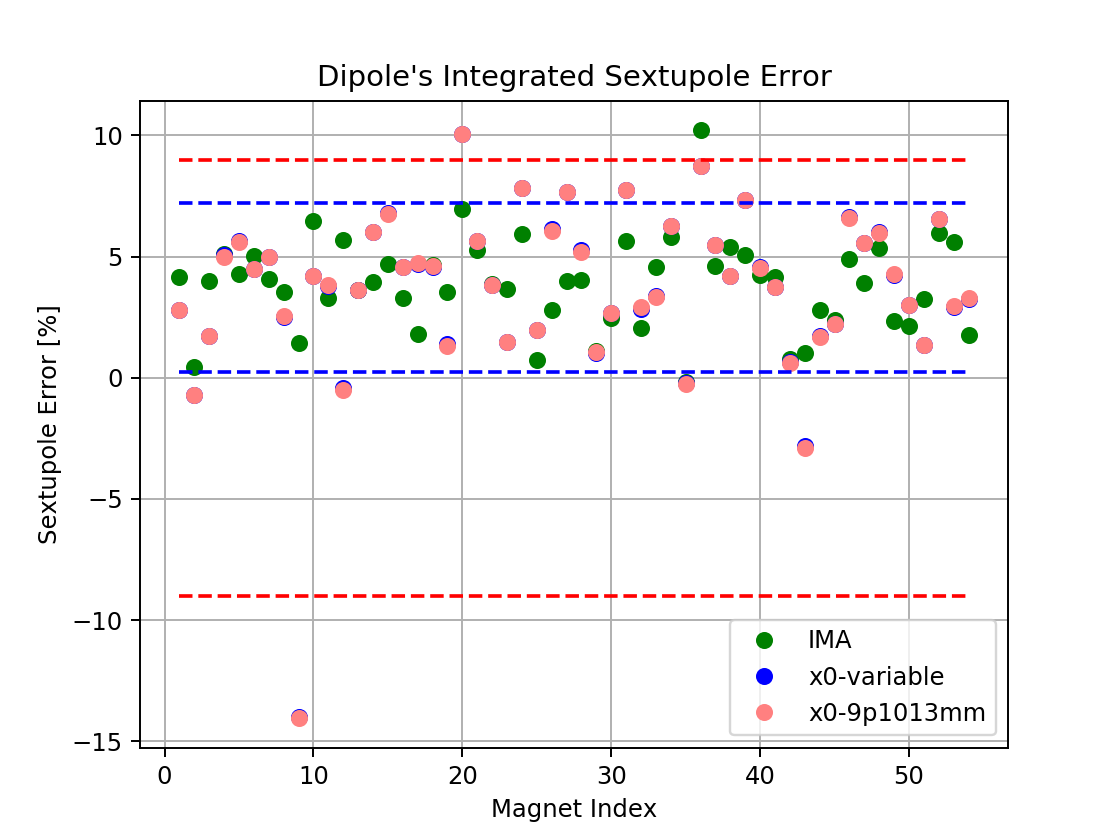

In [35]:
spec_d, spec_d_error = spec_sext, spec_sext_error

d2 = np.array([data2[mag][2] for mag in serials])
d2_error = 100*(d2 - spec_d)/spec_d
d2_error = 100*(d2 - spec_d)/spec_d
d2_error_std = np.std(d2_error)

d = np.array([data[mag][3] for mag in serials])
d_avg = np.mean(d)
d_avg_error = 100*(d_avg - spec_d)/spec_d
d_error = 100*(d - spec_d)/spec_d
d_error_avg = np.mean(d_error)
d_error_std = np.std(d_error)
n = len(d_error)

d3 = np.array([data3[mag][3] for mag in serials])
d3_avg = np.mean(d3)
d3_avg_error = 100*(d3_avg - spec_d)/spec_d
d3_error = 100*(d3 - spec_d)/spec_d
d3_error_avg = np.mean(d3_error)
d3_error_std = np.std(d3_error)


print('Specification sextupole                    : {:+.5f} T'.format(spec_d))
print('Magnets sextupole average (IMA)            : {:+.5f} T. ({:+.2f} %)'.format(d2_avg, d2_avg_error))
print('Magnets sextupole average (FAC)            : {:+.5f} T. ({:+.2f} %)'.format(d_avg, d_avg_error))
print('Magnets sextupole average (FAC x0=9.1013mm): {:+.5f} T. ({:+.2f} %)'.format(d3_avg, d3_avg_error))

print()
print('Specification sextupole stddev            : {:.2f} %'.format(spec_d_error))
print('Magnets sextupole stddev (IMA)            : {:.2f} %'.format(d2_error_std))
print('Magnets sextupole stddev (FAC)            : {:.2f} %'.format(d_error_std))
print('Magnets sextupole stddev (FAC x0=9.1013mm): {:.2f} %'.format(d3_error_std))


plt.figure()
# Data
plt.plot(range(1,n+1), d2_error, 'og', label='IMA')
plt.plot(range(1,n+1), d_error, 'ob', label='x0-variable')
plt.plot(range(1,n+1), d3_error, 'o', color=(1,0.5,0.5), label='x0-9p1013mm')
# Data RMS
plt.plot([1, n], [d_error_avg + d_error_std, ]*2, '--b')
plt.plot([1, n], [d_error_avg - d_error_std, ]*2, '--b')
# Spec RMS
plt.plot([1, n], [-spec_d_error, ]*2, '--r')
plt.plot([1, n], [+spec_d_error, ]*2, '--r')

plt.grid()
plt.xlabel('Magnet Index')
plt.ylabel('Sextupole Error [%]')
plt.title("Dipole's Integrated Sextupole Error")
plt.legend()
plt.show()

# Trajectory X position at Magnet Longitudinal Center

X position average: 18.2360 mm
X position stdddev: 53.1 um
X position maxdiff: 145.0 um


<IPython.core.display.Javascript object>


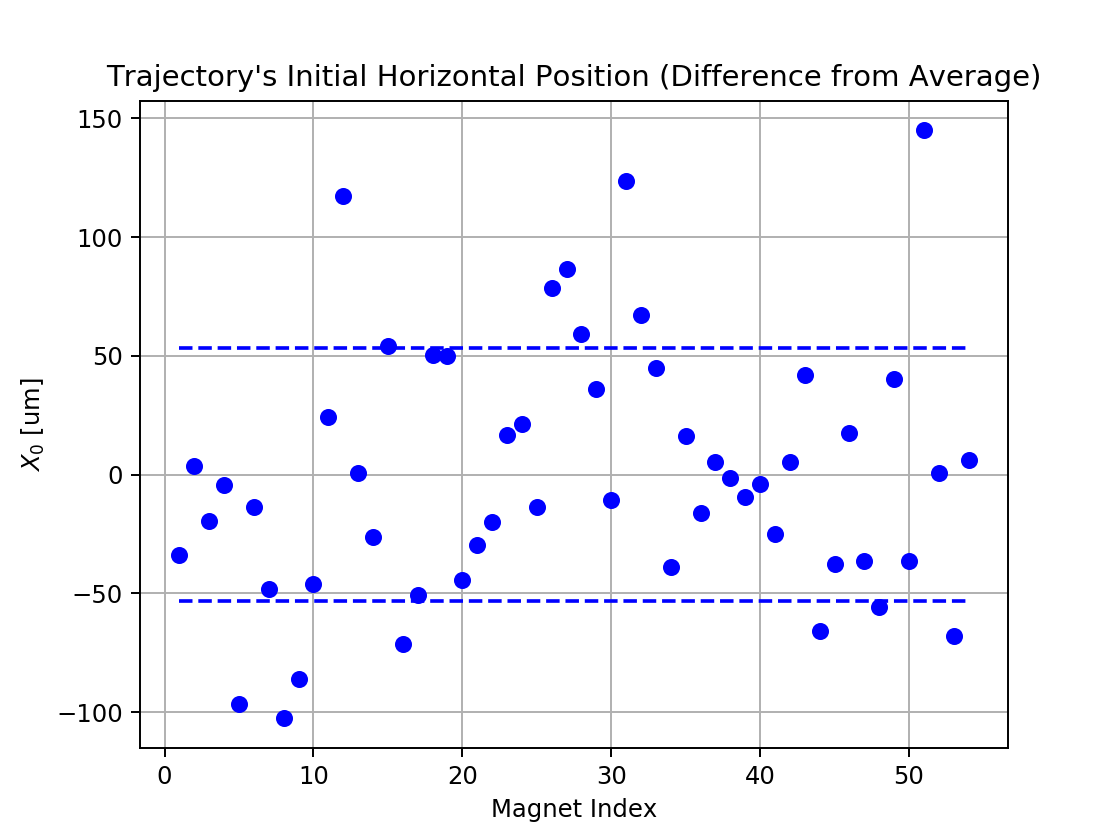

In [5]:
d = 1000*np.array([data[mag][4] for mag in serials])
d_avg = np.mean(d)
d_diff = d - d_avg
n = len(d_diff)

print('X position average: {:.4f} mm'.format(np.mean(d)/1000))
print('X position stdddev: {:.1f} um'.format(np.std(d)))
print('X position maxdiff: {:.1f} um'.format(max(abs(d_diff))))

# Data
plt.plot(range(1,n+1), d_diff, 'ob')
# Data RMS
plt.plot([1, n], [-np.std(d), ]*2, '--b')
plt.plot([1, n], [+np.std(d), ]*2, '--b')

plt.grid()
plt.xlabel('Magnet Index')
plt.ylabel('$X_0$ [um]')
plt.title("Trajectory's Initial Horizontal Position (Difference from Average)")
plt.show()

# Neglected Edge Field Contribution to Deflection Angle

1. Simulation: fieldmap calculaded in [-80, 35] mm (step 1 mm) from -1000 to 1000 mm
2. Measurements: data taken in [-50, 50] mm (step 2 mm) from ~ -786 mm to 786 mm

<IPython.core.display.Javascript object>


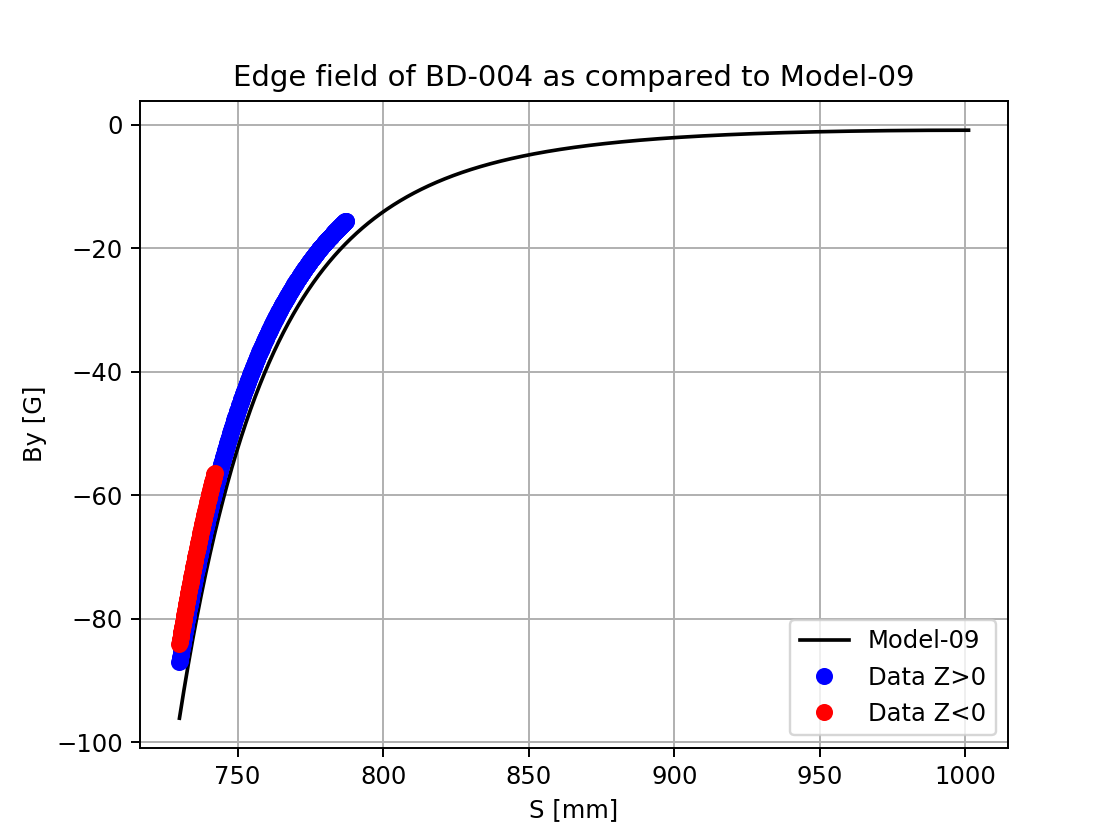

missing angle (z>0): -0.007 %
missing angle (z<0): -0.021 %


In [6]:
magnet ='004'

# read multipoles from model-09
lines = []
with open('/home/fac_files/lnls-ima/bo-dipoles/model-09/analysis/fieldmap/model-3gev/multipoles.txt') as f:
    lines = f.readlines()
data = []
for line in lines[2:]:
    d = [float(s) for s in line.split()]
    data.append(d)
mpoles = np.array(data)
s, by = mpoles[:,0], mpoles[:,1]

# read multipoles from (positive)
lines = []
with open('/home/fac_files/lnls-ima/bo-dipoles/model-09/analysis/hallprobe/production/bd-'+magnet+'/M1/0991p63A/z-positive/multipoles.txt') as f:
    lines = f.readlines()
data = []
for line in lines[2:]:
    d = [float(s) for s in line.split()]
    data.append(d)
mpoles = np.array(data)
sP, byP = mpoles[:,0], mpoles[:,1]

# read multipoles from (negative)
lines = []
with open('/home/fac_files/lnls-ima/bo-dipoles/model-09/analysis/hallprobe/production/bd-'+magnet+'/M1/0991p63A/z-negative/multipoles.txt') as f:
    lines = f.readlines()
data = []
for line in lines[2:]:
    d = [float(s) for s in line.split()]
    data.append(d)
mpoles = np.array(data)
sN, byN = mpoles[:,0], mpoles[:,1]

nplot = 7300
plt.figure()
plt.plot(s[nplot:], 10000*by[nplot:], 'k')
plt.plot(sP[nplot:], 10000*byP[nplot:], 'ob')
plt.plot(-sN[nplot:], 10000*byN[nplot:], 'or')
plt.xlabel('S [mm]')
plt.ylabel('By [G]')
plt.legend(['Model-09', 'Data Z>0', 'Data Z<0'])
plt.title('Edge field of BD-' + magnet + ' as compared to Model-09')
plt.grid()
plt.show()

edgeP, edgeN = len(sP), len(sN)
missing_angle_P = (180/np.pi)*np.trapz(by[edgeP:], s[edgeP:]/1000) / brho
missing_angle_N = (180/np.pi)*np.trapz(by[edgeN:], s[edgeN:]/1000) / brho
ang_error_P = 100*(missing_angle_P) / spec_dip
ang_error_N = 100*(missing_angle_N) / spec_dip
print('missing angle (z>0): {:.3f} %'.format(ang_error_P))
print('missing angle (z<0): {:.3f} %'.format(ang_error_N))

8.29153304658


<IPython.core.display.Javascript object>


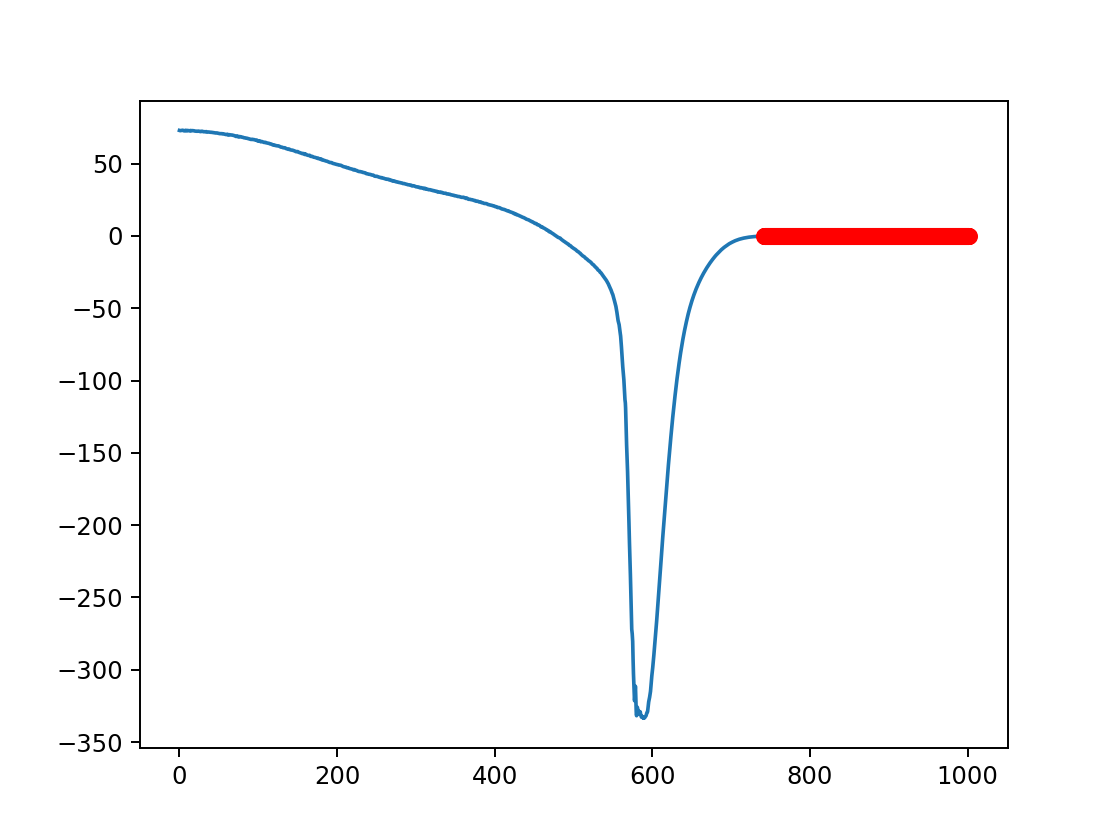

In [7]:
# Missing octupolar component
lines = []
with open('/home/fac_files/lnls-ima/bo-dipoles/model-09/analysis/fieldmap/model-3gev/multipoles.txt') as f:
    lines = f.readlines()
data = []
for line in lines[2:]:
    d = [float(s) for s in line.split()]
    data.append(d)
mpoles = np.array(data)
s, gl = mpoles[:,0], mpoles[:,4]


v0 = np.trapz(gl, s/1000)
vP = np.trapz(gl[:edgeP], s[:edgeP]/1000)
vN = np.trapz(gl[:edgeN], s[:edgeN]/1000)
print(100*(2*v0-1*vP-vN)/2/v0)
plt.figure()
plt.plot(s,gl)
plt.plot(s[edgeN:],gl[edgeN:], 'or')
plt.show()